In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Exploratory Data Analysis

Now that we've successfully pre-processed the data, we can build some exploratory plots to examine the relationship between each of the input variables and the default variable

In [8]:
#Build out columns we are going to select from the dataset
id_column = ['ID']
numeric_columns = ['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Age_Days', 'Employed_Days']
binary_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Loan_Contract_Type', 'Default']
categorical_columns = ['Client_Income_Type', 'Client_Education', 'Client_Marital_Status']

selected_columns = id_column + numeric_columns + binary_columns + categorical_columns

selected_columns = ['ID',
 'Client_Income',
 'Car_Owned',
 'Bike_Owned',
 'Active_Loan',
 'House_Own',
 'Child_Count',
 'Credit_Amount',
 'Loan_Annuity',
 'Client_Income_Type',
 'Client_Education',
 'Client_Marital_Status',
 'Loan_Contract_Type',
 'Age_Days',
 'Employed_Days',
 'Default']

In [9]:
df_auto_loan = pd.read_csv('df_auto_loan.csv').set_index('ID')
df_auto_loan

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Client_Marital_Status,Loan_Contract_Type,Age_Days,Employed_Days,Default
ID,,,,,,,,,,,,,,,
12142509,6750.0,0,0,1,0,0.0,61190.55,3416.85,Commercial,High_School,M,0,13957.0,1062.0,0
12181264,18000.0,0,0,1,0,1.0,59527.35,2788.20,Service,College_Dropout,W,0,16790.0,5102.0,0
12133385,33750.0,1,0,1,0,2.0,133988.40,3547.35,Commercial,High_School,M,0,11366.0,2977.0,0
12191614,11250.0,0,1,1,1,1.0,13752.00,653.85,Service,High_School,W,0,13881.0,1184.0,0
12100935,27000.0,0,0,1,1,1.0,67500.00,3375.00,Govt Job,College,S,1,14816.0,2263.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12183464,10350.0,0,1,0,0,0.0,18792.90,1736.55,Service,College_Dropout,S,0,9204.0,763.0,0
12173765,15750.0,0,1,1,0,0.0,104256.00,3388.05,Commercial,College,M,0,8648.0,636.0,0
12103937,8100.0,0,1,0,1,1.0,55107.90,2989.35,Govt Job,High_School,M,0,9152.0,1623.0,0


### Numeric Variables

For each numeric variable, we can create 2 box plots:
- 1 box plot examining the range of the numeric variable when default = 0
- 1 box plot examining the range of the numeric variable when default = 1

In [10]:
#Creates 2 subsets where the default=0 and default=1
s_bool = df_auto_loan.loc[:, 'Default'] == 0
df_auto_loan_d0 = df_auto_loan.loc[s_bool, :]
s_bool = df_auto_loan.loc[:, 'Default'] == 1
df_auto_loan_d1 = df_auto_loan.loc[s_bool, :]

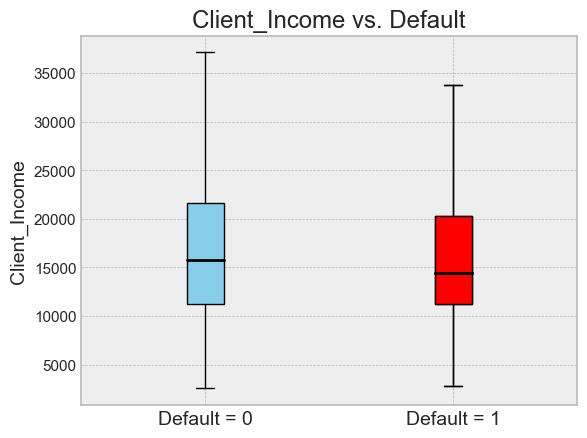

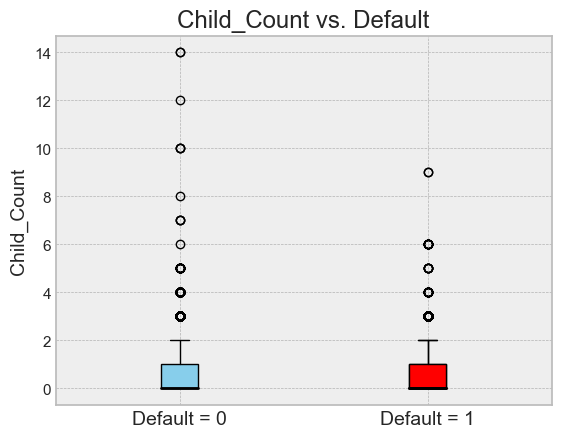

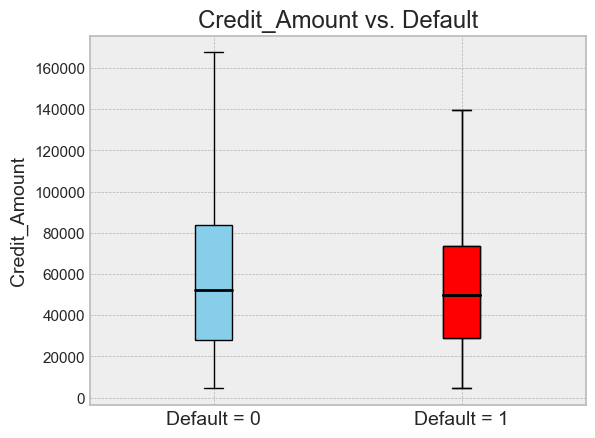

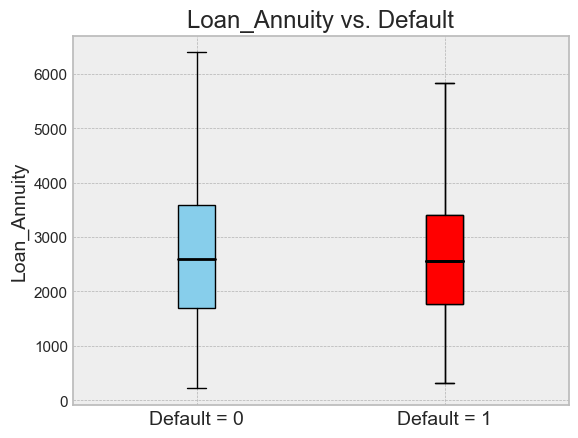

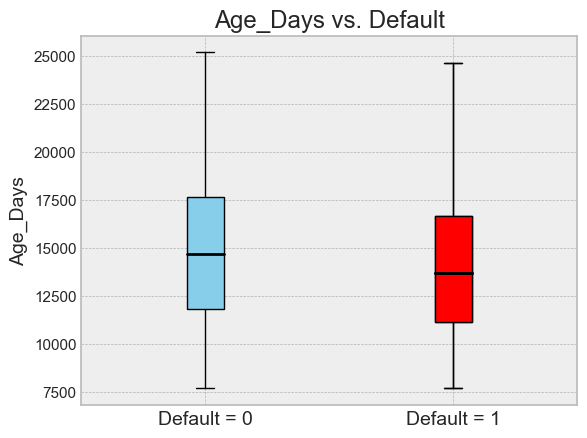

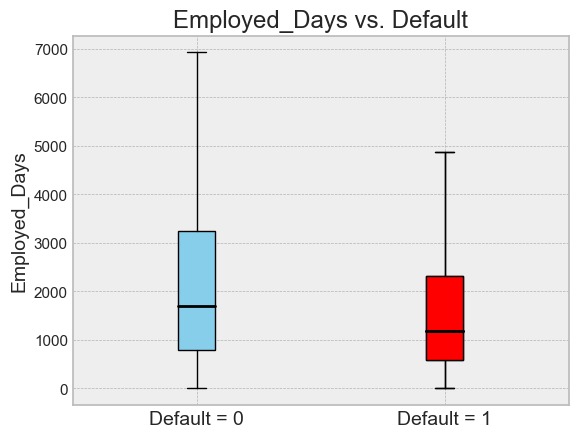

In [11]:
#For every numeric column, we will create a separate graph with 2 boxplots
for col in numeric_columns:
    
    sns.set()
    plt.style.use('bmh')
    
    #We're only going to view the outliers for Child_Count, for the other columns it makes the box plot hard to see
    show_outliers = False
    if col == 'Child_Count':
        show_outliers = True
        
    #Plots 2 boxplots side by side
    plt.boxplot([df_auto_loan_d0[col].values, df_auto_loan_d1[col].values],
                showfliers=show_outliers,
                patch_artist=True,
                boxprops=dict(facecolor='skyblue', alpha=1),
                medianprops=dict(color='black', linewidth=2))
    #Colors the 2nd box plot (default = 1) red
    plt.boxplot([df_auto_loan_d1[col].values],
                showfliers=show_outliers,
                patch_artist=True,
                boxprops=dict(facecolor='red', alpha=1),
                medianprops=dict(color='black', linewidth=2),
                positions=[2])
    #Renames x axis labels
    plt.xticks([1, 2], ['Default = 0', 'Default = 1'], fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.title(f'{col} vs. Default')
    
    plt.show()


### Binary and Categorical Variables

For each binary and categorical variable, we can create a stacked bar plot. The x axis will consist of each type of value for the categorical variable, with its own bar plot representing the proportion of clients who default or do not default.

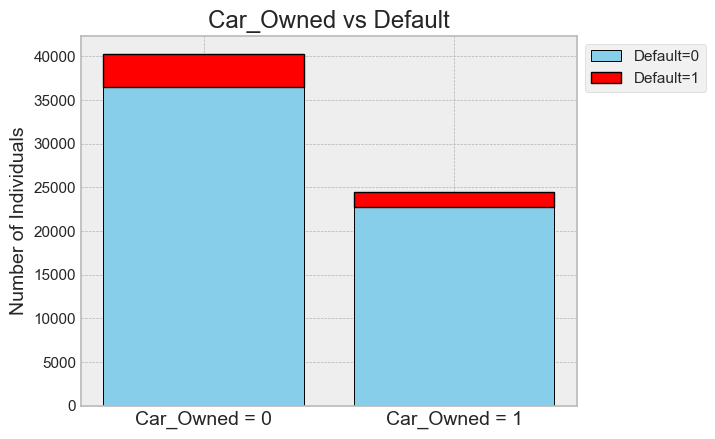

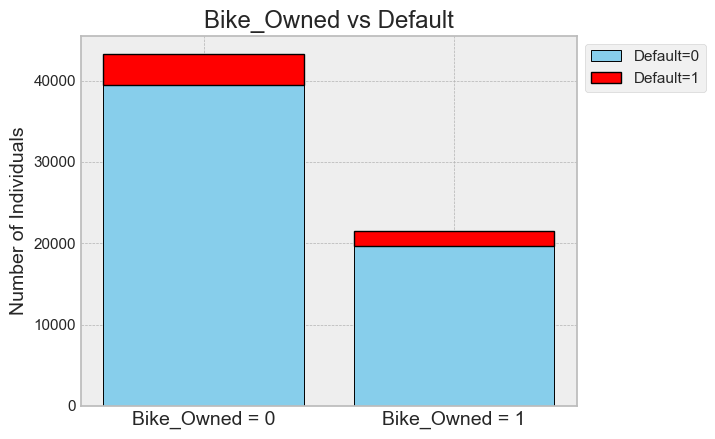

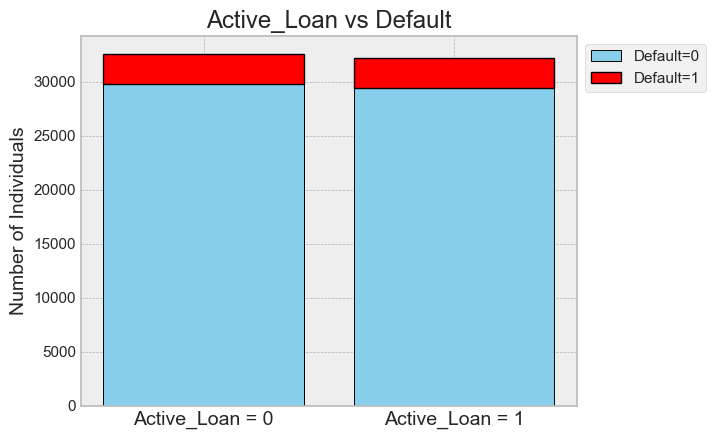

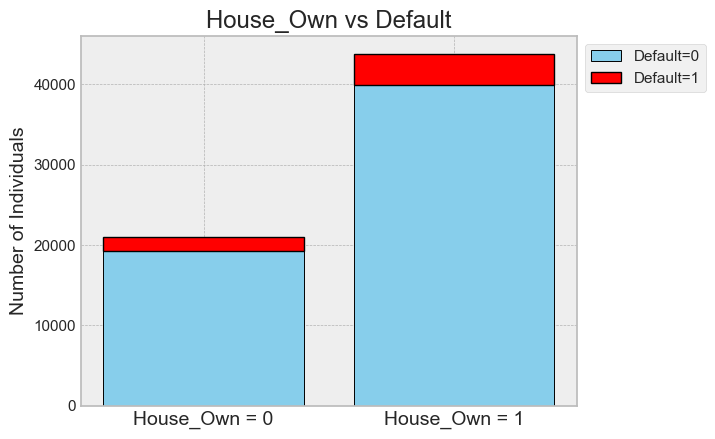

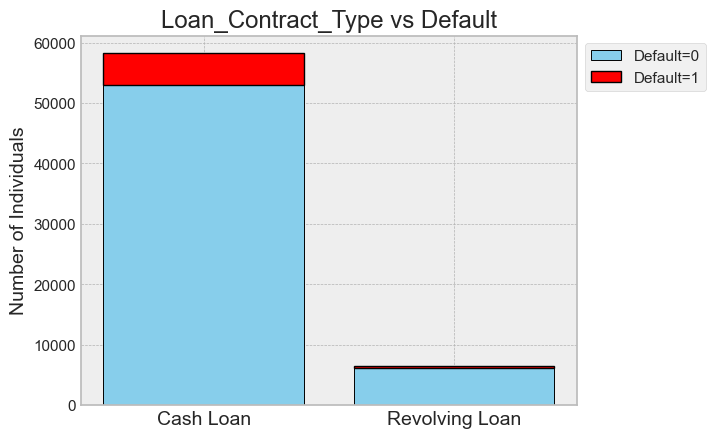

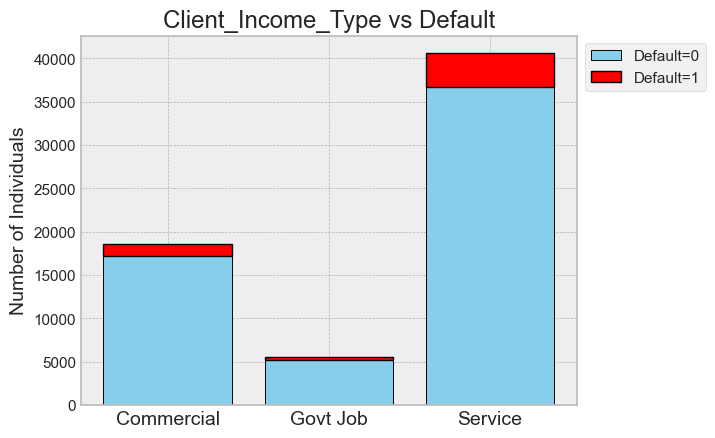

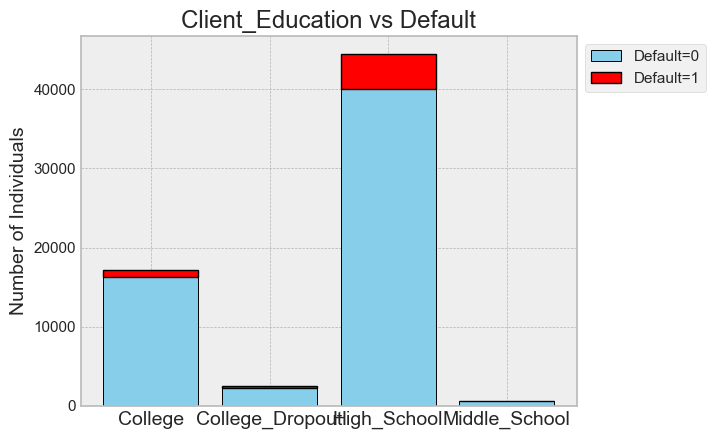

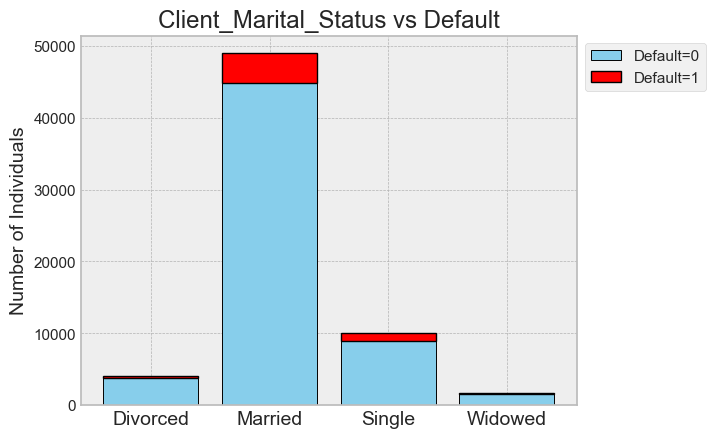

In [12]:
#For every binary and categorical variable, we will create a separate stacked bar plot
for col in binary_columns + categorical_columns:
    
    sns.set()
    plt.style.use('bmh')
    
    #We don't need to examine the relationship of Default vs. Default
    if col == 'Default':
        continue
    
    #For each type of value in the input variable, counts how many of each appear in the data subsets
    d0_value_counts = dict(sorted(dict(Counter(df_auto_loan_d0[col])).items()))
    d1_value_counts = dict(sorted(dict(Counter(df_auto_loan_d1[col])).items()))
    
    #This is a list of the types of values in the input variable
    category_types = list(d0_value_counts.keys())
    
    #Renames the types of values if needed
    if col == 'Client_Marital_Status':
        category_dict = {'W': 'Widowed', 'M': 'Married', 'D': 'Divorced', 'S': 'Single'}
        category_types = [category_dict[elem] for elem in category_types]
    if col in binary_columns:
        if col == 'Loan_Contract_Type':
            category_dict = {0.0: 'Cash Loan', 1.0: 'Revolving Loan'}
        else:
            category_dict = {0.0: f'{col} = 0', 1.0: f'{col} = 1'}
        category_types = [category_dict[elem] for elem in category_types]
        
    
    d0_values = list(d0_value_counts.values())
    d1_values = list(d1_value_counts.values())
    
    #This plots the bottom bars (default = 0)
    plt.bar(category_types, d0_values, label='Default=0', color='skyblue', edgecolor='black', linewidth=0.7)
    #This plots the top bars (default = 1)
    plt.bar(category_types, d1_values, bottom=d0_values, label='Default=1', color='red', alpha=1, edgecolor='black', linewidth=1)
    
    plt.ylabel('Number of Individuals', fontsize=14)
    plt.xticks(fontsize=14)
    plt.title(f'{col} vs Default')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    plt.show()
    

From the above plots, we can't find many significant effects different input variables have on the default variable:
- Numeric:
    - There is very little difference between the distribution of the numeric data across default=0 and default=1
- Categorical:
    - Here, we can see some more relationships between the categorical types and the default variable when looking at the differences in proportions.
        - Car_Owned and Bike_Owned:
            - If individuals already own a car or bike, the proportions tell us they are less likely to default on their auto loan
        - Active_Loan:
            - Here, we can see no apparent difference between default likelihood whether or not individuals already have an active loan out at the time of application
        - House_Own:
            - If individuals own a house, they are more likely to 
        - Loan_Contract_Type
            - A higher proportion of individuals who take out cash loans will default than those who take our revolving loans
        - Client_Income_Type
            - Those who work in government jobs are less likely to default then those in commercial or service
        - Client_Education
            - Clients whose highest level of education is a High School Diploma are more likely to default
        - Client_Marital_Status
            - Clients who are married are more likely to default
